In [1]:
from qiskit import *
from qiskit import Aer, transpile
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit import IBMQ
from qiskit.converters import circuit_to_dag
import json
from qiskit.tools.monitor import job_monitor
%matplotlib inline

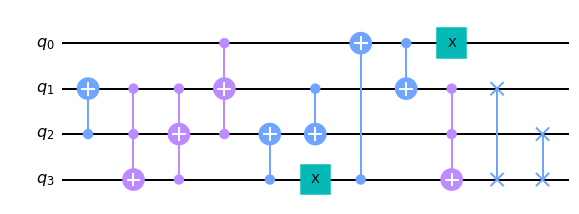

In [3]:
sbox = QuantumCircuit(4)
qubits = [
    [2,1],
    [1,2,3],
    [1,3,2],
    [0,2,1],
    [3,2],
    [1,2],
    [3],
    [3,0],
    [0,1],
    [0],
    [1,2,3],
]

for i in qubits:
    if len(i) == 1:
        sbox.x(i[0])
    elif len(i) == 2:
        sbox.cnot(i[0],i[1])
    elif len(i) == 3:
        sbox.toffoli(i[0],i[1],i[2])
    else:
        sbox.mct(i[:-1],i[-1])

sbox.swap(3,1)
sbox.swap(2,3)

sbox.draw('mpl')

In [4]:
with open('./latex/sbox.tex','w') as f:
    data = sbox.draw('latex_source')
    f.write(data)